In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down');

<IPython.core.display.Javascript object>

In [2]:
#vizualization packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [3]:
#import required packages

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns


import pyLDAvis.gensim


#nlp
import string
import re     #for regex
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary


#Modeling
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from scipy import sparse

from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator


#constants
eng_stopwords = set(stopwords.words("english"))

lem = WordNetLemmatizer()
tokenizer=ToktokTokenizer()


%matplotlib inline

C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\urllib3\contrib\pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL
C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [4]:
import requests
import bs4
import lxml
import re
import datetime
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [5]:
excel = pd.read_csv('Sports_Advice_Data_Set.csv')
index = list(range(excel.shape[0]))
columns = ["header","subtitle","body"]
df = pd.DataFrame(index=index, columns=columns)
df = df.fillna(0)
df

,header,subtitle,body
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


## Scraping

Scraping the data fraom website and storing it in pandas dataframe

The first column is the title of the article

The second column consists sub-headings

The third column contains body of the article

In [6]:
title=[]
sub_heading = []
body = []
x = 0


for i in excel.Link:
    res = requests.get(i)
    soup = bs4.BeautifulSoup(res.text,"lxml")
    header = soup.select('title')
    heading = list(header[0])
    heading=str(heading)
    heading_modified = heading.rsplit(' | ', 1)[0]
    final_head = str(re.sub('[^A-Za-z0-9]+', ' ', heading_modified))
    final_head = str(re.sub(r'\b\w{1,1}\b', '', final_head))
    final_head = list(final_head)
    final_head = "".join(final_head)
    title.append(final_head)
    #df['header'] = title
    
    sub_data = soup.find_all("div",{"class":"title brick-field"})
    for sub in sub_data:
            sub_part = sub.text
            sub_heading.append(sub_part)
            sub_heading[:len(sub_heading)-1]
            sub_heading[len(sub_heading)-1:]
            sub_heading = list(map(lambda x:x.strip(),sub_heading))
            df['subtitle'][x] = sub_heading
    sub_heading=[]
    
    
    

    body_a = soup.find_all("div",{"class":"field field-name-body field-type-text-with-summary field-label-hidden"})
    for bod in body_a:
            bod_part = bod.text
            body.append(bod_part)
            body[:len(body)-6]
            body = list(map(lambda x:x.strip(),body))
            df['body'][x] = body
    body=[]
    x=x+1
df['header'] = title
df["Sport"] = excel.Sport
df.head()

C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\builder\_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\builder\_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\builder\_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\builder\_lxml.py:250: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  self.parser.feed(markup)
C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\bu

,header,subtitle,body,Sport
0,FEMININE HYGIENE ON HIKE,"[FEMININE HYGIENE ON A HIKE, Aungsumi Sinha, G...",[With many many difficult experiences while hi...,Hiking
1,HOW TO CHOOSE WATERPROOF HIKING JACKET,"[HOW TO CHOOSE A WATERPROOF HIKING JACKET?, WA...",[There are 3 criteria that determine your choi...,Hiking
2,Do you know the Leave No Trace principles,"[DO YOU KNOW THE 7 ""LEAVE NO TRACE"" PRINCIPLES...",[Do you subscribe to the “Leave no trace” phil...,Hiking
3,Aquaphobia let talk about it,"[AQUAPHOBIA : LET'S TALK ABOUT IT, WHAT IS AQU...",[How to overcome aquaphobia. Some people suffe...,Swimming
4,Aqua sports are growing in popularity,"[AQUA-SPORTS: ARE GROWING IN POPULARITY, AQUA-...",[These well-known aqua-sports are now much tal...,Swimming


In [7]:
df = df.astype(str)
df["all_text"] = df['header'].map(str)+ " " + df['subtitle'].map(str)+ " " +df["body"]
only_text = pd.DataFrame()
only_text = df['all_text']


index = list(range(excel.shape[0]))
columns = ["header","subtitle","body"]
cleaned_df = pd.DataFrame(index=index, columns=columns)
cleaned_df = cleaned_df.fillna(0)   
col_names = df.columns

for x in col_names:
    df[x] = df[x].str.lower() 
    only_text = df[x]
    only_text = only_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
    #data cleaning
    a = []
    b=[]
    i=0
    new_string = []
    for i in only_text:  
        b = ' '.join([w for w in i.split() if len(w)<15])
        b = ' '.join([w for w in b.split() if len(w)>3])
        a.append(b)
    
    only_text_se = pd.Series(a)
    only_text_se= only_text_se.str.replace('[^a-z0-9A-Z \n]',"")
    cleaned_df[x] = only_text_se
    
cleaned_df.head()

,header,subtitle,body,Sport,all_text
0,feminine hygiene hike,feminine hygiene hike general hygiene women hi...,with many many difficult experiences hiking au...,hiking,feminine hygiene hike feminine hygiene hike ge...
1,choose waterproof hiking jacket,how choose waterproof hiking jacket the outsid...,there criteria determine choice waterproof jac...,hiking,choose waterproof hiking jacket how choose wat...
2,know leave trace principles,do know leave trace principles plan ahead prep...,do subscribe leave trace philosophy philosophy...,hiking,know leave trace principles do know leave trac...
3,aquaphobia talk,aquaphobia lets talk it what aquaphobia how fe...,how overcome aquaphobia people suffer chronic ...,swimming,aquaphobia talk aquaphobia lets talk it what a...
4,aqua sports growing popularity,aquasports growing popularity aquayoga aquabox...,these wellknown aquasports much talked about n...,swimming,aqua sports growing popularity aquasports grow...


C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


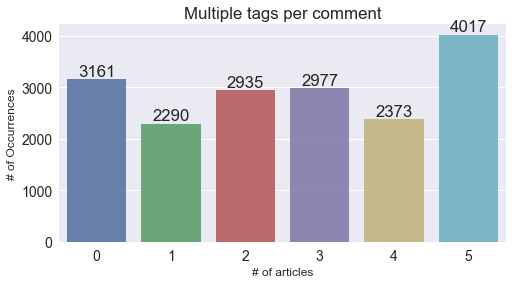

In [45]:
i=0
num_words = []
for i in range(cleaned_df.shape[0]):
    num_words.append(len(cleaned_df.all_text[i]))

cleaned_df['num_words'] = num_words
x=cleaned_df["num_words"]
value = list(range(0,6))
#getting the frequency of number of 1 present in each record

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(value, x, alpha=0.9)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of articles', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

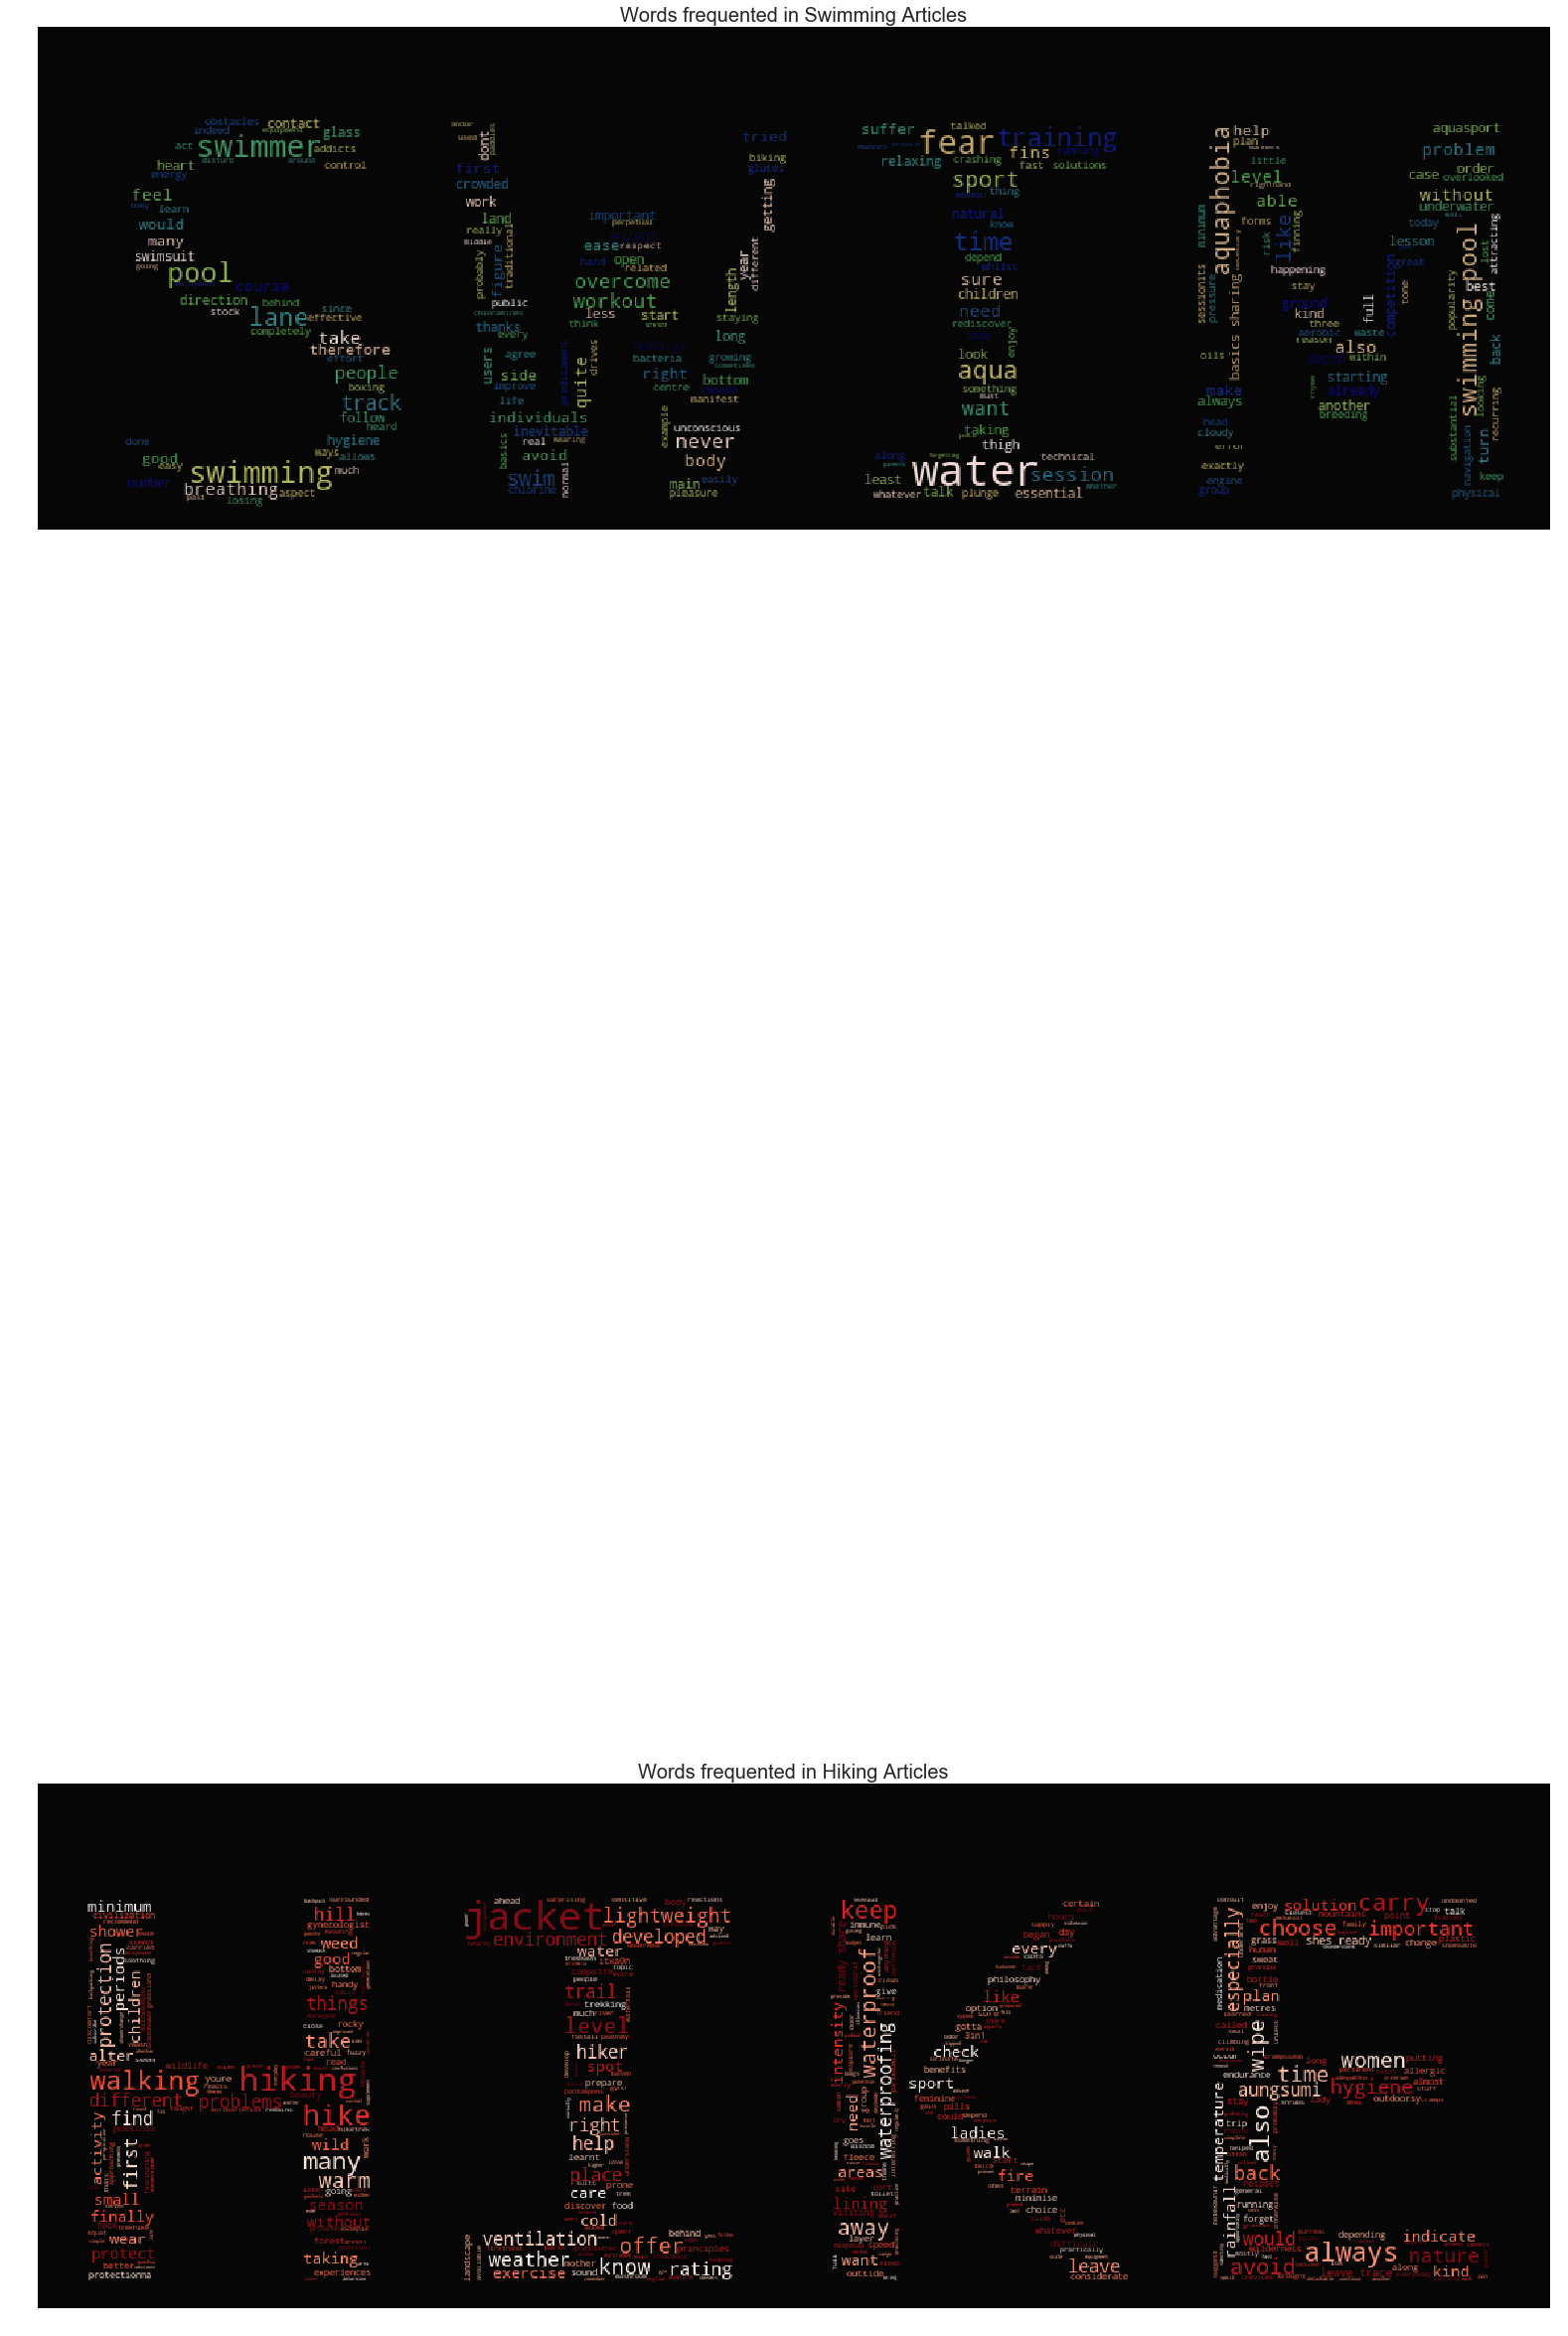

In [51]:
toxic_mask=np.array(Image.open("swim.jpg")) #open the image which you want to mask
toxic_mask=toxic_mask[:,:,1] #taking the final layer for masking
#wordcloud for clean comments
subset=cleaned_df[cleaned_df.Sport=='swimming'] #subsetting only those records which are classified as swimming
text=subset.all_text.values #getting the words
wc= WordCloud(background_color="black",max_words=4000,mask=toxic_mask,stopwords=stopword) #creating a word cloud 
wc.generate(" ".join(text)) #generating text 
plt.figure(figsize=(60,60)) #figure dimensions
plt.subplot(221) #as we are plotting multiple plots writing it as subset 
plt.axis("off")
plt.title("Words frequented in Swimming Articles", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)




#Severely toxic comments
plt.subplot(223)
severe_toxic_mask=np.array(Image.open("hike.jpg"))
severe_toxic_mask=severe_toxic_mask[:,:,1]
subset=cleaned_df[cleaned_df.Sport=='hiking']
text=subset.all_text.values
wc= WordCloud(background_color="black",max_words=2000,mask=severe_toxic_mask,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Hiking Articles", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

plt.show()

## Lets do LDA

In [11]:
#to seperate sentenses into words
def preprocess(comment):
    """
    Function to build tokenized texts from input comment
    """
    return gensim.utils.simple_preprocess(comment, deacc=True, min_len=3)


In [12]:
cleaned_df.all_text

0    feminine hygiene hike feminine hygiene hike ge...
1    choose waterproof hiking jacket how choose wat...
2    know leave trace principles do know leave trac...
3    aquaphobia talk aquaphobia lets talk it what a...
4    aqua sports growing popularity aquasports grow...
5    basics sharing swimming pool the basics sharin...
Name: all_text, dtype: object

In [13]:
#tokenize the comments
all_text=cleaned_df.all_text.apply(lambda x: preprocess(x)) #this will output each word separated by comma
all_text #example of this output

0    [feminine, hygiene, hike, feminine, hygiene, h...
1    [choose, waterproof, hiking, jacket, how, choo...
2    [know, leave, trace, principles, know, leave, ...
3    [aquaphobia, talk, aquaphobia, lets, talk, wha...
4    [aqua, sports, growing, popularity, aquasports...
5    [basics, sharing, swimming, pool, the, basics,...
Name: all_text, dtype: object

In [15]:
#create the dictionary
dictionary = Dictionary(all_text)
print("There are",len(dictionary),"number of words in the final dictionary")

There are 1242 number of words in the final dictionary


In [16]:
#scale it to all text
corpus = [dictionary.doc2bow(text) for text in all_text]

In [17]:
#create the LDA model
ldamodel = LdaModel(corpus=corpus, num_topics=2, id2word=dictionary)
pyLDAvis.enable_notebook()

In [18]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x    y
topic                                          
0      57.69817        1       1  0.003676  0.0
1      42.30183        1       2 -0.003676  0.0, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
721   Default   7.000000  aquaphobia   7.000000  30.0000  30.0000
270   Default   5.000000      people   5.000000  29.0000  29.0000
224   Default   5.000000        know   5.000000  28.0000  28.0000
344   Default   6.000000     jackets   6.000000  27.0000  27.0000
200   Default   5.000000       never   5.000000  26.0000  26.0000
36    Default   5.000000        away   5.000000  25.0000  25.0000
714   Default   5.000000        feel   5.000000  24.0000  24.0000
109   Default   5.000000   important   5.000000  23.0000  23.0000
32    Default   3.000000   solutions   3.000000  22.0000  22.0000
42    Default   9.000000      always   9.000000  21.0000  21.0000
17    Default   3.000000      things   3.000000  20.0000  20.0000
217   Default   2.000000        well   2.000000  19.0000  19.0000
122   Default   3.000000       wipes   3.000000  18.0000  18.0000
759   Default   3.000000        ease   3.000000  17.0000  17.0000
707   Default   3.000000       tried   3.000000  16.0000  16.0000
61    Default   5.000000       first   5.000000  15.0000  15.0000
54    Default   2.000000       hills   2.000000  14.0000  14.0000
323   Default  12.000000      jacket  12.000000  13.0000  13.0000
436   Default   3.000000       sport   3.000000  12.0000  12.0000
5     Default  11.000000      hiking  11.000000  11.0000  11.0000
22    Default  11.000000         you  11.000000  10.0000  10.0000
189   Default   3.000000        stay   3.000000   9.0000   9.0000
119   Default   7.000000        keep   7.000000   8.0000   8.0000
281   Default   3.000000      bottom   3.000000   7.0000   7.0000
190   Default   1.000000       weeds   1.000000   6.0000   6.0000
324   Default   3.000000         how   3.000000   5.0000   5.0000
295   Default   2.000000      normal   2.000000   4.0000   4.0000
29    Default   3.000000    aungsumi   3.000000   3.0000   3.0000
111   Default   5.000000       would   5.000000   2.0000   2.0000
67    Default   9.000000        time   9.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
42     Topic2   4.397454      always   9.258263   0.1158  -5.4653
281    Topic2   1.982784      bottom   3.959146   0.1688  -6.2619
61     Topic2   2.890419       first   5.946126   0.1390  -5.8850
324    Topic2   1.973700         how   3.959949   0.1640  -6.2664
29     Topic2   1.668213    aungsumi   3.297883   0.1788  -6.4346
5      Topic2   5.234916      hiking  11.940531   0.0358  -5.2910
22     Topic2   5.220142         you  11.941838   0.0328  -5.2938
119    Topic2   3.354205        keep   7.283276   0.0850  -5.7361
254    Topic2  10.052397       water  25.985228  -0.0894  -4.6385
67     Topic2   4.343714        time   9.952098   0.0313  -5.4776
111    Topic2   2.762498       would   5.957439   0.0918  -5.9302
940    Topic2   2.469029     workout   5.294309   0.0975  -6.0425
840    Topic2   2.978326        swim   6.627434   0.0605  -5.8550
528    Topic2   2.196498     minimum   4.629328   0.1148  -6.1595
796    Topic2   6.354253    swimming  18.043286  -0.1833  -5.0972
26     Topic2   3.723407        many   9.317873  -0.0570  -5.6317
797    Topic2   4.755271        pool  13.361115  -0.1728  -5.3871
425    Topic2   3.442699    training   8.653615  -0.0614  -5.7101
188    Topic2   2.783653        want   6.644651  -0.0097  -5.9226
196    Topic2   3.094170       avoid   7.995355  -0.0890  -5.8168
23     Topic2   3.708149        also  10.697388  -0.1991  -5.6358
672    Topic2   2.743283        even   6.648221  -0.0249  -5.9372
697    Topic2   3.873727        fear  12.060911  -0.2754  -5.5921
909    Topic2   3.012570        aqua   8.002572  -0.1166  -5.8436
1  

## Naive Bayes

Although we have less number of articles to Train but as the words that are used in the articles will be different which are enough to classify so Lets apply a basic model and see

In [19]:
cleaned_df.head()

,header,subtitle,body,Sport,all_text,num_words
0,feminine hygiene hike,feminine hygiene hike general hygiene women hi...,with many many difficult experiences hiking au...,hiking,feminine hygiene hike feminine hygiene hike ge...,3161
1,choose waterproof hiking jacket,how choose waterproof hiking jacket the outsid...,there criteria determine choice waterproof jac...,hiking,choose waterproof hiking jacket how choose wat...,2290
2,know leave trace principles,do know leave trace principles plan ahead prep...,do subscribe leave trace philosophy philosophy...,hiking,know leave trace principles do know leave trac...,2935
3,aquaphobia talk,aquaphobia lets talk it what aquaphobia how fe...,how overcome aquaphobia people suffer chronic ...,swimming,aquaphobia talk aquaphobia lets talk it what a...,2977
4,aqua sports growing popularity,aquasports growing popularity aquayoga aquabox...,these wellknown aquasports much talked about n...,swimming,aqua sports growing popularity aquasports grow...,2373


In [20]:
X= cleaned_df['all_text']
y=cleaned_df['Sport']
#splitting the data into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4,)
(2,)
(4,)
(2,)


C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
y_train

3    swimming
2      hiking
5    swimming
0      hiking
Name: Sport, dtype: object

In [59]:
X_train

3    aquaphobia talk aquaphobia lets talk it what a...
2    know leave trace principles do know leave trac...
5    basics sharing swimming pool the basics sharin...
0    feminine hygiene hike feminine hygiene hike ge...
Name: all_text, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer()

In [58]:
#fitting train data and then transforming it to count matrix
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4x971 sparse matrix of type '<class 'numpy.int64'>'
	with 1281 stored elements in Compressed Sparse Row format>

In [60]:
#transforming the test data into the count matrix initiated for train data
#no fitting takes place
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2x971 sparse matrix of type '<class 'numpy.int64'>'
	with 148 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data 
nb.fit(X_train_dtm, y_train)

#predicting the model on train and test data
y_pred_class_test = nb.predict(X_test_dtm)
y_pred_class_train = nb.predict(X_train_dtm)

In [25]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_test))
print(metrics.accuracy_score(y_train, y_pred_class_train))

0.5
1.0


In [26]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
m = metrics.confusion_matrix(y_test, y_pred_class_test)

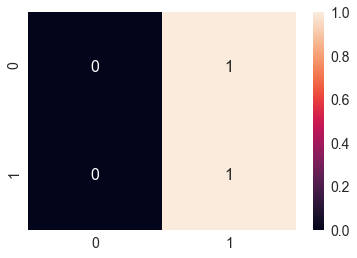

In [27]:
import seaborn  as  sns
import  matplotlib
%matplotlib inline
cm = metrics.confusion_matrix(y_test, y_pred_class_test)
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm,annot=True,annot_kws={"size": 16})# font size

In [61]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

971

In [62]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['abandoned', 'ability', 'able', 'accelerate', 'accident', 'according', 'act', 'adapt', 'addicts', 'adjacent', 'advantage', 'advised', 'after', 'again', 'againwipe', 'ago', 'agree', 'ahead', 'aims', 'allergic', 'allergies', 'almost', 'alone', 'along', 'alongxa0this', 'already', 'also', 'alter', 'alters', 'always', 'amount', 'and', 'andor', 'animals', 'another', 'antibacterial', 'anxieties', 'anyone', 'anything', 'anytime', 'apart', 'apology', 'appearni', 'approaching', 'approx', 'aquaphobia', 'aquaphobiani', 'aquatic', 'areas', 'around']


In [64]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

array([[ 1.,  1.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [65]:
# number of times each token appears across all trek articles
trek_token_count = nb.feature_count_[0, :]

In [32]:
# number of times each token appears across all swim articles
swim_token_count = nb.feature_count_[1, :]

In [33]:
# create a DataFrame of tokens with their separate swim and trek counts
tokens = pd.DataFrame({'token':X_train_tokens, 'swim':swim_token_count, 'trek':trek_token_count}).set_index('token')

In [67]:
tokens.head()

,swim,trek
token,,
abandoned,0.0,1.0
ability,0.0,1.0
accelerate,1.0,0.0
accident,1.0,0.0
adapt,1.0,0.0


In [34]:
freq_swim = tokens.sort_values(by='swim', ascending = False)
freq_swim = freq_swim.drop('trek',1)
freq_swim_20 = freq_swim.head(20)
freq_swim.head()

,swim
token,
swimmers,12.0
aquaphobia,10.0
lane,8.0
overcome,7.0
quite,5.0


C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


[Text(0,0.5,'Frequency of word'), Text(0.5,0,'Words')]

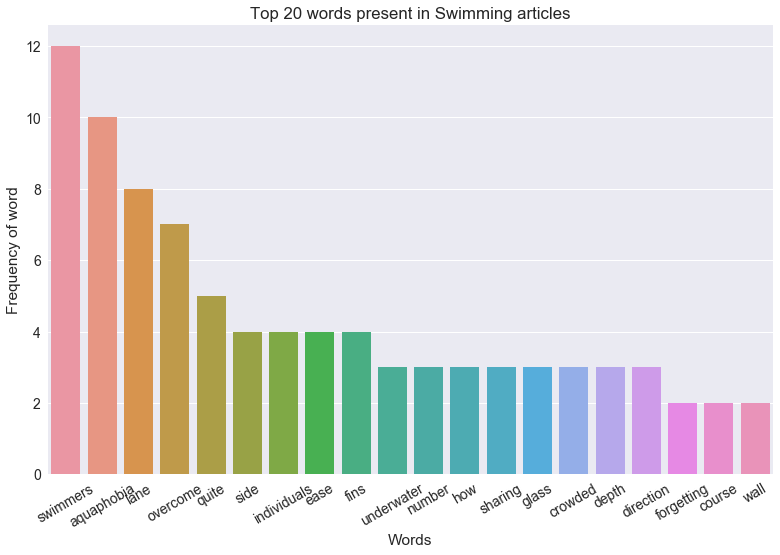

In [36]:
import matplotlib.pyplot as ply
a4_dims = (13, 8.27)  #oo is the frequency of the words present in real records
fig, ax = ply.subplots(figsize=a4_dims)
g = sns.barplot(x=freq_swim_20.index,y='swim',data=freq_swim_20,ax=ax)
g.set_xticklabels(rotation=30,labels=freq_swim_20.index)
plt.title('Top 20 words present in Swimming articles')
ax.set(xlabel='Words', ylabel='Frequency of word')

In [37]:
freq_trek = tokens.sort_values(by='trek', ascending = False)
freq_trek = freq_trek.drop('swim',1)
freq_trek = freq_trek.drop(freq_trek.index[[3]])
freq_trek_20 = freq_trek.head(20)
freq_trek.head()

,trek
token,
wipes,5.0
especially,4.0
find,3.0
spot,3.0
wild,3.0


C:\Users\NIT-BGDT\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


[Text(0,0.5,'Frequency of word'), Text(0.5,0,'Words')]

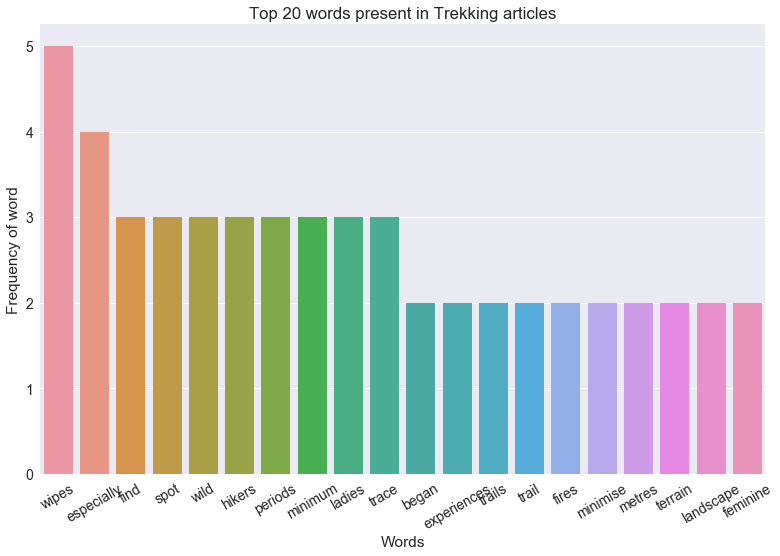

In [39]:
import matplotlib.pyplot as ply
a4_dims = (13, 8.27)  #oo is the frequency of the words present in real records
fig, ax = ply.subplots(figsize=a4_dims)
g = sns.barplot(x=freq_trek_20.index,y='trek',data=freq_trek_20,ax=ax)
g.set_xticklabels(rotation=30,labels=freq_trek_20.index)
plt.title('Top 20 words present in Trekking articles')
ax.set(xlabel='Words', ylabel='Frequency of word')